In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import re

In [6]:
import pandas as pd
import glob

# Đọc và xử lý từng file CSV
path = 'all/*.csv'
cleaned_dfs = []
for file in glob.glob(path):
    try:
        df = pd.read_csv(file, on_bad_lines='skip')
        df_cleaned = df.dropna()
        cleaned_dfs.append(df_cleaned)

    except pd.errors.ParserError as e:
        print(f"Lỗi khi đọc file {file}: {e}")

df_combined = pd.concat(cleaned_dfs, ignore_index=True)
df_combined.to_csv("combined_cleaned_file.csv", index=False)
df_combined.to_csv("combined_cleaned_file.txt", sep='\t', header=True, index=False)
print("Dữ liệu sau khi gộp, làm sạch và đánh lại ID:")
print(df_combined)

Dữ liệu sau khi gộp, làm sạch và đánh lại ID:
        id                                             Review  \
0     1601  giảng dạy cứng nhắc , áp đặp , không thu hút ,...   
1     1602  giảng dạy hay , đưa ra một số ví dụ thực tế để...   
2     1603          cho bài tập nâng cao khả năng tiếng anh .   
3     1604                    em thấy học vậy cũng được rồi .   
4     1605  đề cương môn học chưa được cập nhật cho sinh v...   
...    ...                                                ...   
7773    96              nên tự tin hơn trong việc giảng dạy .   
7774    97  giảng viên có cập nhật thông tin mới nhất về t...   
7775    98       giáo viên rất nhiệt tình đối với sinh viên .   
7776    99                    cảm thấy hứng thú khi lên lớp .   
7777   100  cùng một kiến thức nhưng cách truyền đạt của t...   

                                     Sentence Component  \
0     giảng dạy cứng nhắc , áp đặp , không thu hút ,...   
1     giảng dạy hay , đưa ra một số ví dụ thực tế để...

In [ ]:
df = pd.read_csv('combined_cleaned_file.txt', index=False, header=True) # file  merge2
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'combined_cleaned_file.txt'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  7778 non-null   int64 
 1   Review              7778 non-null   object
 2   Sentence Component  7778 non-null   object
 3   aspect_text         7778 non-null   object
 4   aspect              7778 non-null   object
 5   sentiment_text      7778 non-null   object
 6   sentiment           7778 non-null   object
dtypes: int64(1), object(6)
memory usage: 425.5+ KB


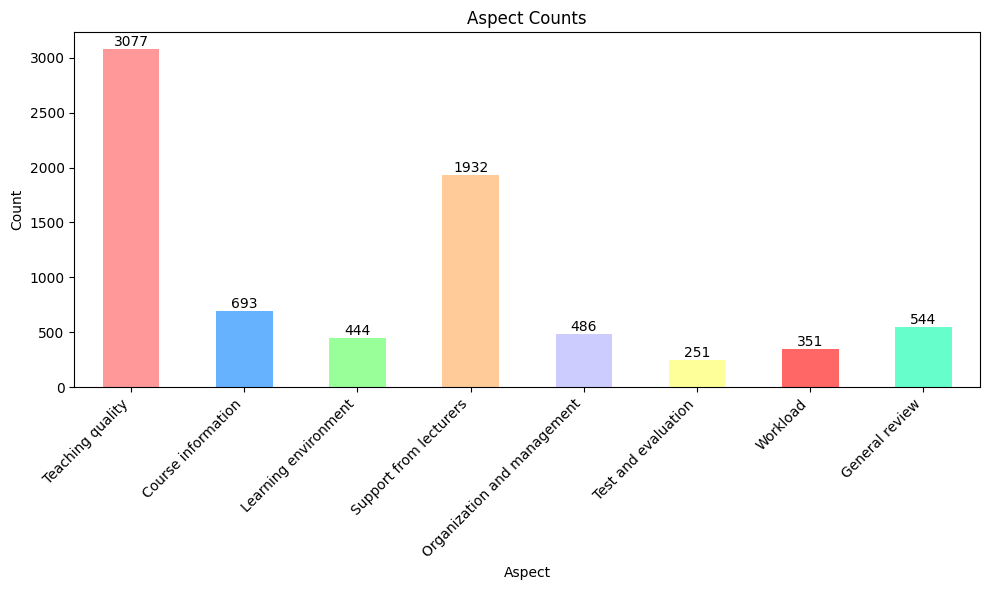

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already loaded into a dataframe named df
# Count occurrences of the specified aspects
aspects_to_count = ['Teaching quality', 'Course information', 'Learning environment', 'Support from lecturers',
                    'Organization and management', 'Test and evaluation', 'Workload', 'General review']

# Filter and count occurrences of each aspect
aspect_counts = df['aspect'].value_counts().reindex(aspects_to_count).fillna(0)

# Define custom colors for each aspect
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FFFF99', '#FF6666', '#66FFCC']

# Plotting the aspect counts as a bar chart
plt.figure(figsize=(10, 6))
bars = aspect_counts.plot(kind='bar', color=custom_colors)

# Adding labels and title
plt.title('Aspect Counts')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding the count labels on top of each bar
for index, value in enumerate(aspect_counts):
    plt.text(index, value, int(value), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo bảng màu tùy chỉnh
custom_palette = {
    'Positive': 'green',
    'Neutral': 'yellow',
    'Negative': 'red'
}

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    y='sentiment', 
    order=df['sentiment'].value_counts().index, 
    hue='sentiment',  # Gán biến y vào hue
    dodge=False,  # Tránh chia nhóm trong cột
    palette=custom_palette  # Gán bảng màu tùy chỉnh
)

# Thêm số trên cột
for p in ax.patches:
    width = p.get_width()  # Lấy chiều rộng của cột (số lượng)
    ax.text(
        width + 0.5,  # Vị trí x (cách một chút để không trùng với cột)
        p.get_y() + p.get_height() / 2,  # Vị trí y (giữa cột)
        int(width),  # Giá trị hiển thị (số lượng)
        va='center',  # Canh giữa theo chiều dọc
        fontsize=14  # Tăng kích thước chữ hiển thị trên cột
    )

# Tăng kích cỡ chữ cho tiêu đề và nhãn
plt.title('Phân phối sentiment', fontsize=16)  # Tăng kích thước tiêu đề
plt.xlabel('Số lượng', fontsize=14)  # Tăng kích thước nhãn trục X
plt.ylabel('Loại sentiment', fontsize=14)  # Tăng kích thước nhãn trục Y

# Tăng kích cỡ chữ cho nhãn trục
plt.xticks(fontsize=14)  # Tăng kích thước nhãn trên trục X
plt.yticks(fontsize=14)  # Tăng kích thước nhãn trên trục Y

plt.show()


ModuleNotFoundError: No module named 'seaborn'

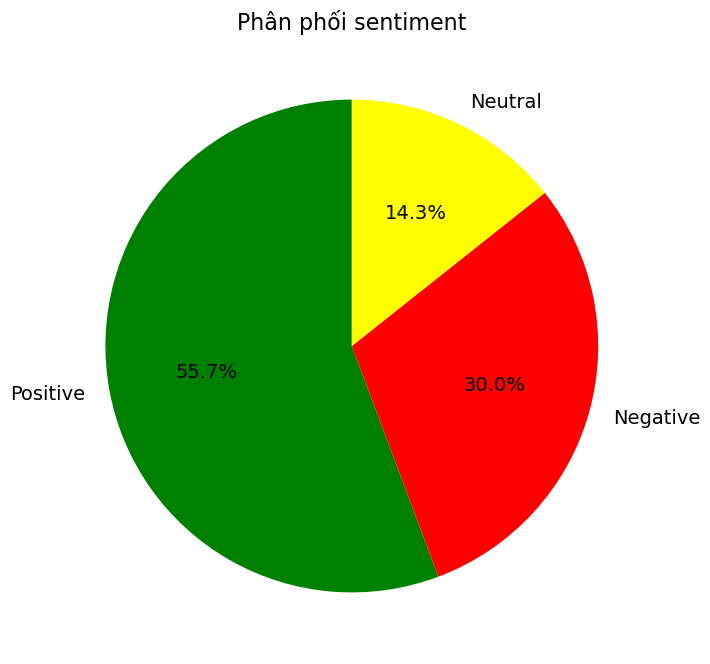

In [ ]:
import matplotlib.pyplot as plt

# Ví dụ DataFrame
data = df['sentiment'].value_counts()  # Thống kê số lượng từng loại sentiment trong cột 'sentiment'

# Tạo bảng màu tùy chỉnh
colors = {
    'Positive': 'green',
    'Neutral': 'yellow',
    'Negative': 'red'
}

# Lấy danh sách màu theo thứ tự các nhãn (index)
color_list = [colors[label] for label in data.index]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(
    data, 
    labels=data.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=color_list,  # Gán màu cho các phần
    textprops={'fontsize': 14}  # Tăng kích thước chữ của nhãn và tỷ lệ
)
plt.title('Phân phối sentiment', fontsize=16)  # Tăng kích thước tiêu đề
plt.show()


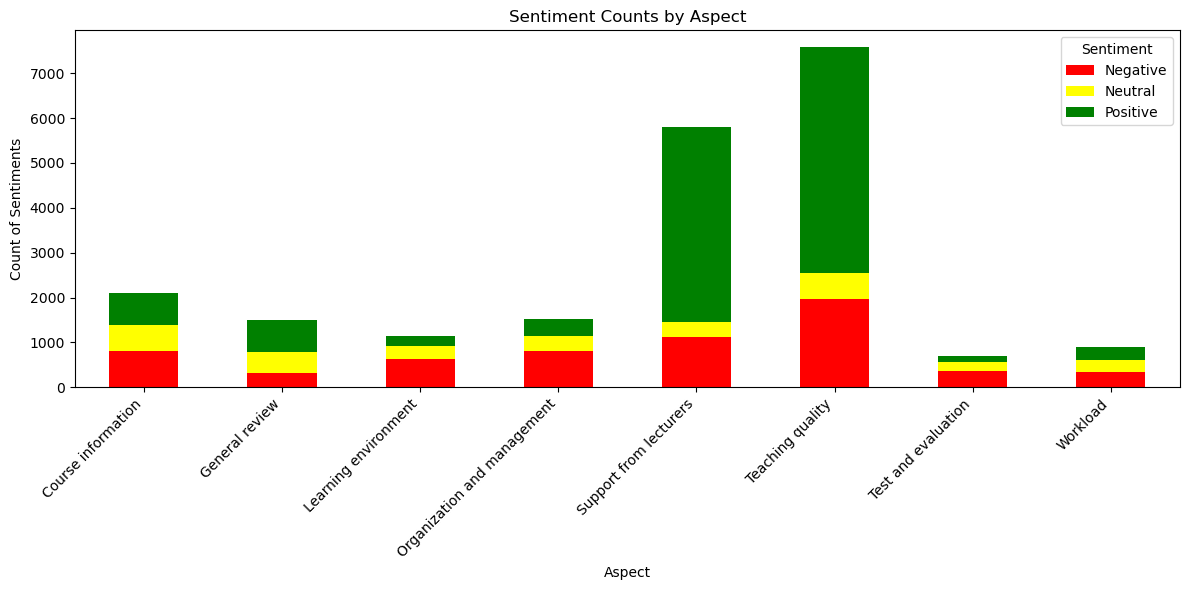

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each sentiment for each aspect
sentiment_counts = df.groupby(['aspect', 'sentiment']).size().unstack(fill_value=0)

# Define custom colors for each sentiment
colors = {
    'Positive': 'green', 
    'Neutral': 'yellow', 
    'Negative': 'red'
}

# Plotting the data as a bar chart
sentiment_counts.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    color=[colors[col] for col in sentiment_counts.columns]  # Apply custom colors
)
plt.title("Sentiment Counts by Aspect")
plt.xlabel("Aspect")
plt.ylabel("Count of Sentiments")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# df = pd.read_csv("data-13-11-2024/all/formattedCsv_sang 2101-2200_20241015.csv")

# # Đếm số lượng cell không null trong mỗi dòng và lưu vào một danh sách
# cell_counts = df.apply(lambda row: row.count(), axis=1)

# # Hiển thị kết quả
# for i, count in enumerate(cell_counts):
#     print(f"Số lượng cell trong dòng {i} là: {count}")

In [ ]:
def get_last_two_digits(string):
    string = str(string)
    # Lấy các chữ số cuối từ chuỗi
    digits = ''.join(filter(str.isdigit, string))
    
    # Kiểm tra độ dài của chuỗi các số
    if len(digits) >= 2:
        return digits[-2:]  # Lấy 2 số cuối
    elif len(digits) == 1:
        return '0' + digits  # Lấy 1 số nếu chuỗi chỉ có 1 số
    else:
        return ''  # Trả về chuỗi rỗng nếu không có số


In [ ]:
def get_first_two_digits(string):
    # Lấy các chữ số từ chuỗi
    string = str(string)
    digits = ''.join(filter(str.isdigit, string))
    
    # Kiểm tra độ dài của chuỗi các số
    if len(digits) >= 2:
        return digits[:2]  # Lấy 2 số đầu
    elif len(digits) == 1:
        return digits  # Lấy 1 số nếu chuỗi chỉ có 1 số
    else:
        return ''  # Trả về chuỗi rỗng nếu không có số

In [ ]:
import pandas as pd
import glob
import re

def get_first_two_digits(string):
    digits = ''.join(filter(str.isdigit, string))
    if len(digits) >= 2:
        return digits[:2]
    elif len(digits) == 1:
        return '0' + digits
    return ''

def get_last_two_digits(string):
    digits = ''.join(filter(str.isdigit, string))
    if len(digits) >= 2:
        return digits[-2:]
    elif len(digits) == 1:
        return '0' + digits
    return ''

def check_column_mismatch(glob_path, expected_columns=7):
    with open("logLoi.txt", "w") as f:
        for file in glob.glob(glob_path):
            # Lấy khoảng ID từ tên file để in ra thông tin, nếu cần
            file_parts = file.split('/')[-1]
            id_range = re.findall(r'\d+', file_parts)[:2]
            
            text_split = file.split('\\')
            f.write(f"Checking file: {text_split} with expected ID range {id_range[0]} - {id_range[1]}\n")

            arr = []

            first_id_range1 = get_first_two_digits(id_range[0])
            first_id_range2 = get_first_two_digits(id_range[1])
            
            temp = int(first_id_range1)
            arr.append(int(first_id_range1))
            while (temp < int(first_id_range2)):
                temp += 100
                arr.append(temp)

            # Đọc dữ liệu từ file
            df = pd.read_csv(file)
            
            mismatched_rows = []
            
            # Đảm bảo cột `id` tồn tại trong dữ liệu
            if 'id' not in df.columns:
                f.write("Không tìm thấy cột 'id' trong file.\n")
                continue
            
            # Kiểm tra từng dòng xem có đủ số cột mong đợi không, dựa trên `id`
            for idx, row in df.iterrows():
                row_id = str(row['id'])  # Lấy giá trị `id` của dòng, đảm bảo là chuỗi
                second = get_last_two_digits(row_id)
                second_first = get_first_two_digits(row_id)
                id_sentence = ''
                
                for i in range(0, len(arr)):
                    if int(second_first) == arr[i]:
                        id_sentence = str(arr[i]) + second
                
                cell_count = row.count()  # Đếm số lượng cell không null
                
                if cell_count != expected_columns:
                    mismatched_rows.append((cell_count, expected_columns, idx))
            
            # Hiển thị kết quả kiểm tra
            if mismatched_rows:
                f.write("File có lỗi\n")
                f.write(f"Có {len(mismatched_rows)} dòng bị lệch cột.\n")
                for row_info in mismatched_rows:
                    f.write(f"Câu có {row_info[0]}  cột (mong đợi {expected_columns} cột) tại dòng {row_info[2]} \n")  # Sửa lại idx thành row_info[2]
            else:
                f.write("Không có dòng nào bị lệch cột.\n")


In [ ]:
check_column_mismatch(path)